# Discretization

Discretization is the process of transfroming continuous variable into discreate variable by creating a set of contiguous intervals that span the range of the variable's value Discreatization is also called bining,where bin is an alternative name for intervsal

In [89]:
import pandas as pd
import numpy as np

In [90]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [91]:
df = pd.read_csv("train.csv",usecols=['age','fare','survived'])

In [92]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [93]:
df.dropna(inplace=True)

In [94]:
df.shape

(714, 3)

In [95]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
X_train.head(2)

,age,fare
328,31.0,20.5250
73,26.0,14.4542


In [98]:
clf = DecisionTreeClassifier()

In [99]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [100]:
accuracy_score(y_test,y_pred)

0.6433566433566433

In [101]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6331181533646323

In [102]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy="quantile")
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy="quantile")

In [103]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [104]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [105]:
# trf.named_transformers_
# trf.named_transformers_['first'].bin_edges_
trf.named_transformers_['second'].bin_edges_



array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [106]:
output = pd.DataFrame({
    "age":X_train['age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train["fare"],
    'fare_trf':X_train_trf[:,1]
})

In [107]:
output['age_lable'] = pd.cut(x=X_train['age'],
                             bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_lable'] = pd.cut(x=X_train['fare'],
                              bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [108]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_lable,fare_lable
446,13.0,0.0,19.5000,5.0,"(0.42, 14.0]","(15.75, 26.0]"
6,54.0,9.0,51.8625,8.0,"(50.0, 80.0]","(51.479, 82.171]"
785,25.0,4.0,7.2500,0.0,"(22.0, 25.0]","(0.0, 7.75]"
203,45.5,8.0,7.2250,0.0,"(42.0, 50.0]","(0.0, 7.75]"
660,50.0,9.0,133.6500,9.0,"(42.0, 50.0]","(82.171, 512.329]"


In [109]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [110]:
accuracy_score(y_test,y_pred)

0.6433566433566433

In [111]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6260758998435054

In [114]:
def  discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4)) 
    plt.subplot(121)
    plt.hist(X['age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("After")

    plt.show()    
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('Fare')

    plt.show()    
    
    
    

0.628971048513302


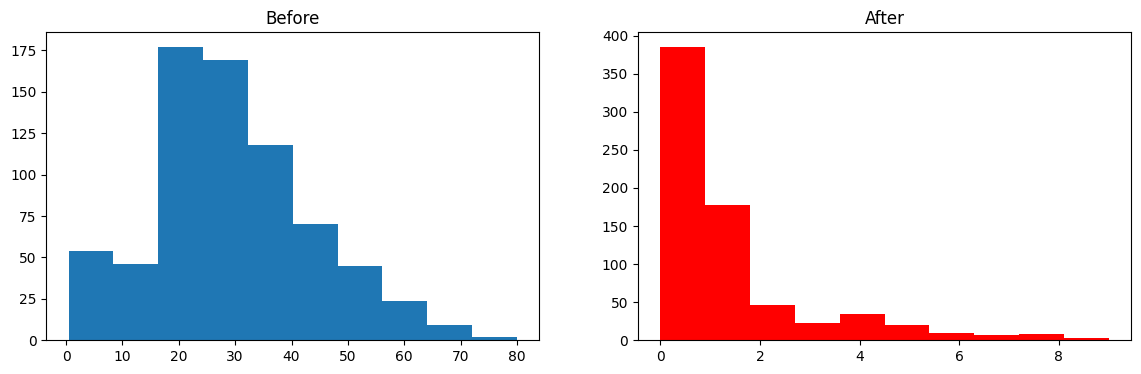

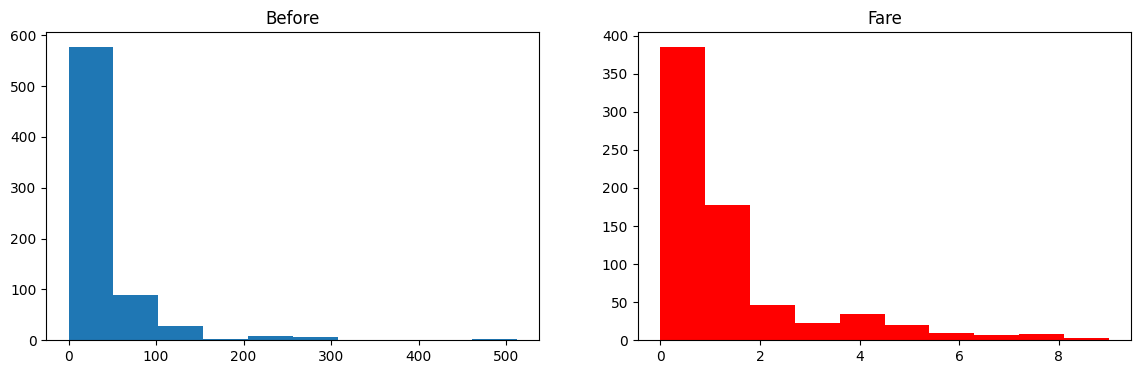

In [117]:
discretize(10,'kmeans')

# Binarization

In [118]:
import numpy as np
import pandas as pd

In [119]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [124]:
df = pd.read_csv('train.csv')[['age','fare','sibsp','parch','survived']]

In [125]:
df.head(5)

,age,fare,sibsp,parch,survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [126]:
df.dropna(inplace=True)

In [127]:
df.head()

,age,fare,sibsp,parch,survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [128]:
df['family'] = df['sibsp'] + df['parch']

In [131]:
df.sample(5)

,age,fare,sibsp,parch,survived,family
422,29.0,7.8750,0,0,0,0
458,50.0,10.5000,0,0,1,0
725,20.0,8.6625,0,0,0,0
80,22.0,9.0000,0,0,0,0
616,34.0,14.4000,1,1,0,2


In [132]:
df.drop(columns=['sibsp','parch'],inplace=True)

In [133]:
df.head(5)

,age,fare,survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
X = df.drop(columns=['survived'])
y = df['survived']